# TO DO


In [ ]:
# READY stacked bar chart: Application Area Frequency (accumulated, not seperated into Area 1 and 2 to see the total number of papers in each category)
# READY bar chart: Relevane Distribution
# Then we filter into high and medium (no graphic needed, just narrows down for easier further graphics)
# READY Word cloud: to see what other areas may be relevant
# bar chart: high_medium papers per year
# bar chart: ratio (high_medium paper / all publications) per year: to see if negative impacts are getting more relevant
# List: Top Keywords (only high medium)
# confusion matrix: to show distribution of category combinations (only with papers that have 2 categories)

In [ ]:
!pip install pywaffle

# importing data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Preprocessing Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from pywaffle import Waffle # type: ignore
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.patches as mpatches
import os

# Load the CSV file
file_path = '/content/drive/My Drive/Bad Sides of HCI - P1_ CHI.csv'
df = pd.read_csv(file_path)

# Standardizing entries in 'Application Area' and 'Application Area 2'
df['Application Area'] = df['Application Area'].str.strip().str.lower().replace({
    'pyschological': 'psychological',
    'enviromental': 'environmental'
})

df['Application Area 2'] = df['Application Area 2'].str.strip().str.lower().replace({
    'pyschological': 'psychological',
    'enviromental': 'environmental'
})



# Application Area Plot and Relevance Distribution

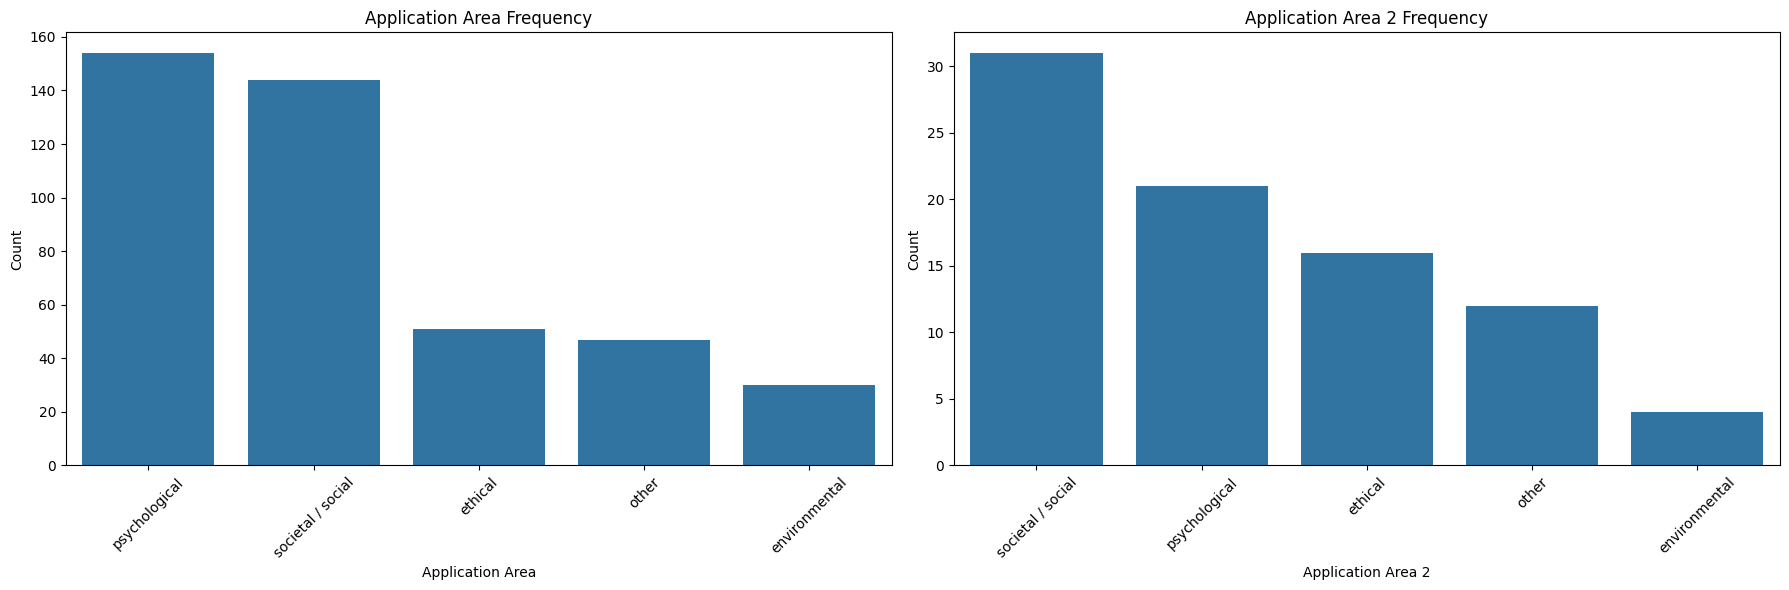

In [ ]:
# Frequency analysis of Application Areas
application_area_counts = df['Application Area'].value_counts()
application_area_2_counts = df['Application Area 2'].value_counts()

# Plotting the results
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Application Area
sns.barplot(x=application_area_counts.index, y=application_area_counts.values, ax=axes[0])
axes[0].set_title('Application Area Frequency')
axes[0].set_xlabel('Application Area')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Application Area 2
sns.barplot(x=application_area_2_counts.index, y=application_area_2_counts.values, ax=axes[1])
axes[1].set_title('Application Area 2 Frequency')
axes[1].set_xlabel('Application Area 2')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

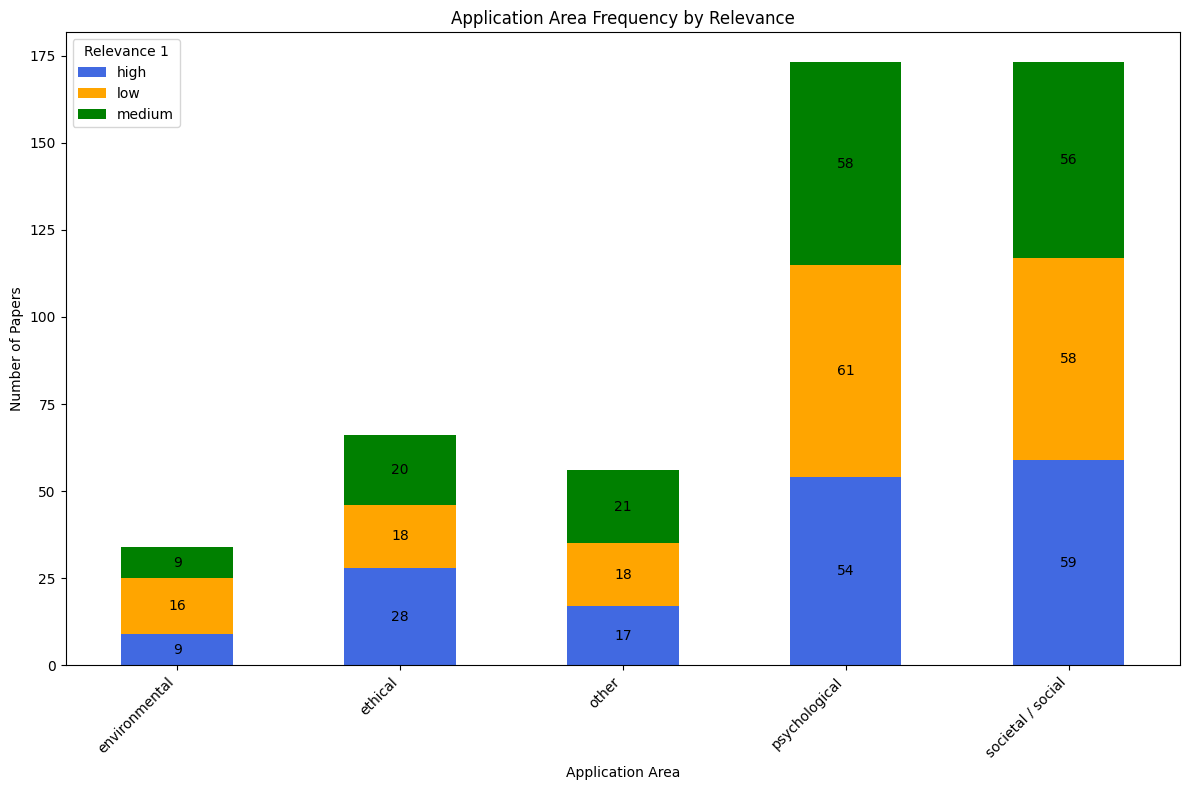

In [ ]:

# Combine 'Application Area' and 'Application Area 2' into a single series and expand the relevance
application_areas = pd.concat([
    df[['Application Area', 'Relevance 1']].rename(columns={'Application Area': 'Application Area'}),
    df[['Application Area 2', 'Relevance 1']].rename(columns={'Application Area 2': 'Application Area'})
]).dropna(subset=['Application Area'])

# Filter out 'none' relevance
application_areas = application_areas[application_areas['Relevance 1'] != 'none']

# Sort the application areas into 'low', 'medium', and 'high'
low_relevance = application_areas[application_areas['Relevance 1'] == 'low']
medium_relevance = application_areas[application_areas['Relevance 1'] == 'medium']
high_relevance = application_areas[application_areas['Relevance 1'] == 'high']

# Combine the sorted data
sorted_application_areas = pd.concat([low_relevance, medium_relevance, high_relevance])

# Count frequency of each application area and relevance level
application_area_relevance_counts = sorted_application_areas.groupby(['Application Area', 'Relevance 1']).size().unstack(fill_value=0)

# Define colors corresponding to 'low', 'medium', 'high'
colors = {'low': 'orange', 'medium': 'green', 'high': 'royalblue'}

# Plot stacked bar chart
ax = application_area_relevance_counts.plot(kind='bar', stacked=True, figsize=(12, 8), color=[colors.get(x, 'grey') for x in application_area_relevance_counts.columns])

# Add the numbers inside the bars
for container in ax.containers:
    labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center')

plt.title('Application Area Frequency by Relevance')
plt.xlabel('Application Area')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot to the specified path
save_path = '/content/drive/My Drive/plots'
if not os.path.exists(save_path):
    os.makedirs(save_path)
plot_filename = os.path.join(save_path, 'application_area_frequency_by_relevance.png')

plt.savefig(plot_filename)
plt.show()


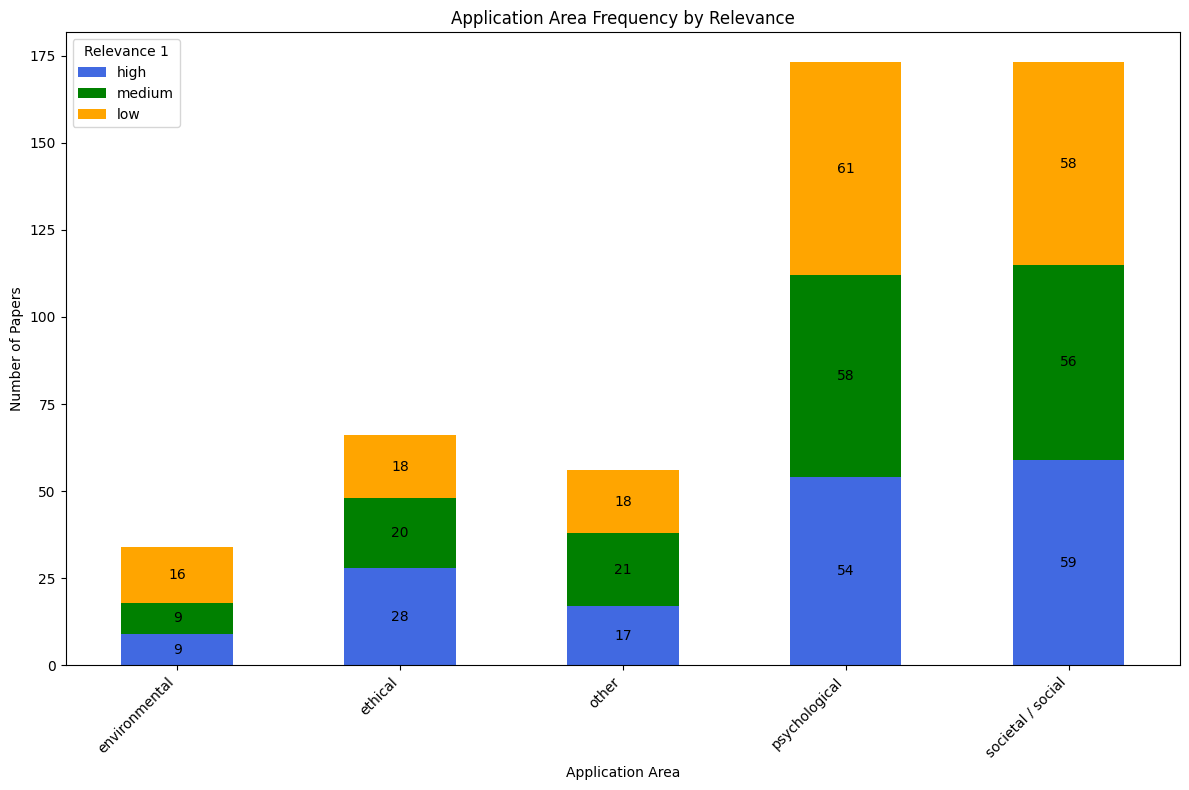

In [ ]:

# Combine 'Application Area' and 'Application Area 2' into a single series and expand the relevance
application_areas = pd.concat([
    df[['Application Area', 'Relevance 1']].rename(columns={'Application Area': 'Application Area'}),
    df[['Application Area 2', 'Relevance 1']].rename(columns={'Application Area 2': 'Application Area'})
]).dropna(subset=['Application Area'])

# Filter out 'none' relevance
application_areas = application_areas[application_areas['Relevance 1'] != 'none']

# Sort the application areas into 'low', 'medium', and 'high'
low_relevance = application_areas[application_areas['Relevance 1'] == 'low']
medium_relevance = application_areas[application_areas['Relevance 1'] == 'medium']
high_relevance = application_areas[application_areas['Relevance 1'] == 'high']

# Combine the sorted data
sorted_application_areas = pd.concat([low_relevance, medium_relevance, high_relevance])

# Count frequency of each application area and relevance level
application_area_relevance_counts = sorted_application_areas.groupby(['Application Area', 'Relevance 1']).size().unstack(fill_value=0)

# Reorder columns to 'high', 'medium', 'low'
application_area_relevance_counts = application_area_relevance_counts[['high', 'medium', 'low']]

# Define colors corresponding to 'low', 'medium', 'high'
colors = {'low': 'orange', 'medium': 'green', 'high': 'royalblue'}

# Plot stacked bar chart
ax = application_area_relevance_counts.plot(kind='bar', stacked=True, figsize=(12, 8), color=[colors.get(x, 'grey') for x in application_area_relevance_counts.columns])

# Add the numbers inside the bars
for container in ax.containers:
    labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center')

plt.title('Application Area Frequency by Relevance')
plt.xlabel('Application Area')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot to the specified path
save_path = '/content/drive/My Drive/plots'
if not os.path.exists(save_path):
    os.makedirs(save_path)
plot_filename = os.path.join(save_path, 'application_area_frequency_by_relevance.png')

plt.savefig(plot_filename)
plt.show()


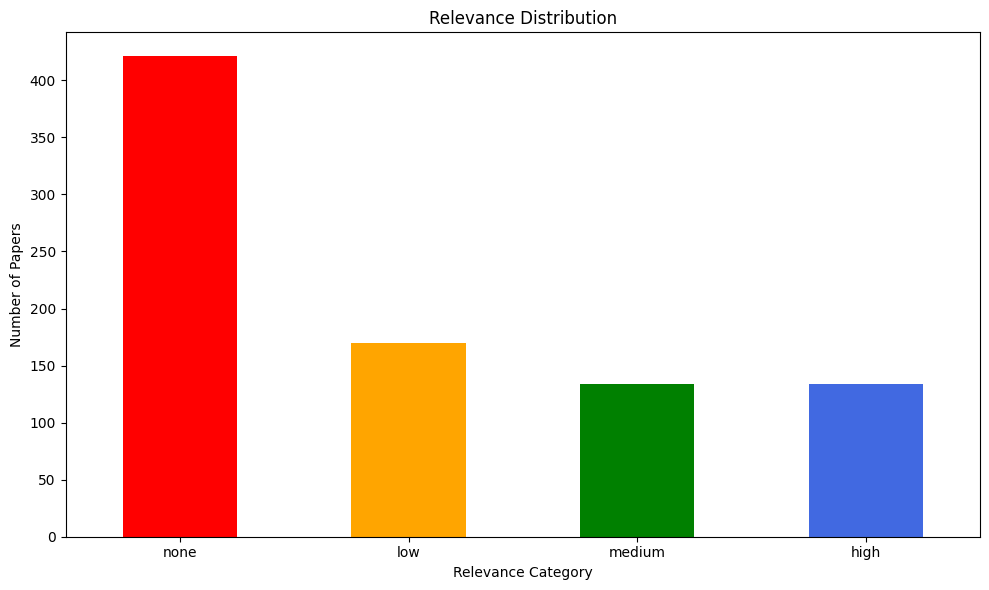

In [ ]:
# Count frequency of each relevance category
relevance_counts = df['Relevance 1'].value_counts()

# Define the desired order
desired_order = ['none', 'low', 'medium', 'high']

# Reindex the series to follow the desired order, filling missing values with 0
relevance_counts = relevance_counts.reindex(desired_order, fill_value=0)

# Define colors corresponding to the desired order
colors = ['red', 'orange', 'green', 'royalblue']

# Plot bar chart
plt.figure(figsize=(10, 6))
ax = relevance_counts.plot(kind='bar', color=colors)


plt.title('Relevance Distribution')
plt.xlabel('Relevance Category')
plt.ylabel('Number of Papers')
plt.xticks(rotation=0)
plt.tight_layout()


save_path = '/content/drive/My Drive/plots'
if not os.path.exists(save_path):
    os.makedirs(save_path)
plot_filename = os.path.join(save_path, 'relevance_distribution.png')

plt.savefig(plot_filename)
plt.show()

# wordcloud for the filtered df (high and medium)

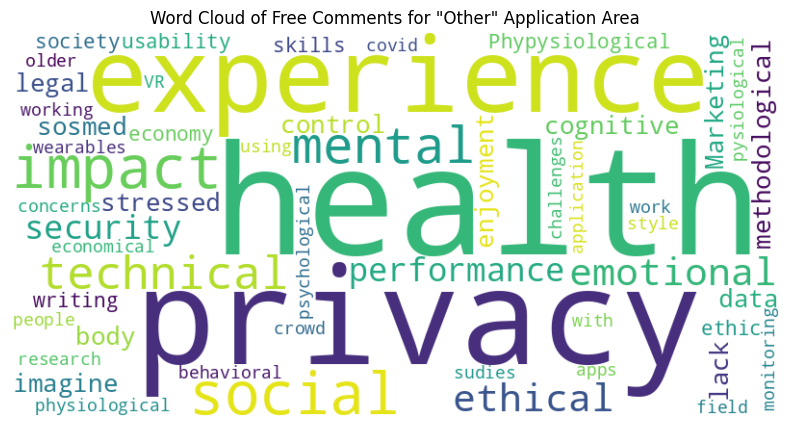

In [ ]:
# Filter data to include only high and medium relevance
filtered_df = df[df['Relevance 1'].isin(['high', 'medium'])]

# Convert free comments to string and handle NaN values
other_comments_str = filtered_df[
    (filtered_df['Application Area'] == 'other') |
    (filtered_df['Application Area 2'] == 'other')
]['clean comments'].astype(str).tolist()

# Tokenize and categorize the comments
other_comments_counter = Counter(" ".join(other_comments_str).split())
# Define additional stop words
additional_stopwords = {"nan", "other:", "other", "(e.g.", "&", "is", "to", "-->","19","and","only","user","of","for","/",")","on"}
# Remove unwanted stopwords manually
filtered_comments_counter = {word: count for word, count in other_comments_counter.items() if word.lower() not in additional_stopwords}

# Visualizing the categorized comments
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(filtered_comments_counter)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Free Comments for "Other" Application Area')


save_path = '/content/drive/My Drive/plots'
if not os.path.exists(save_path):
    os.makedirs(save_path)
plot_filename = os.path.join(save_path, 'free_com_wordcloud.png')

plt.savefig(plot_filename)
plt.show()

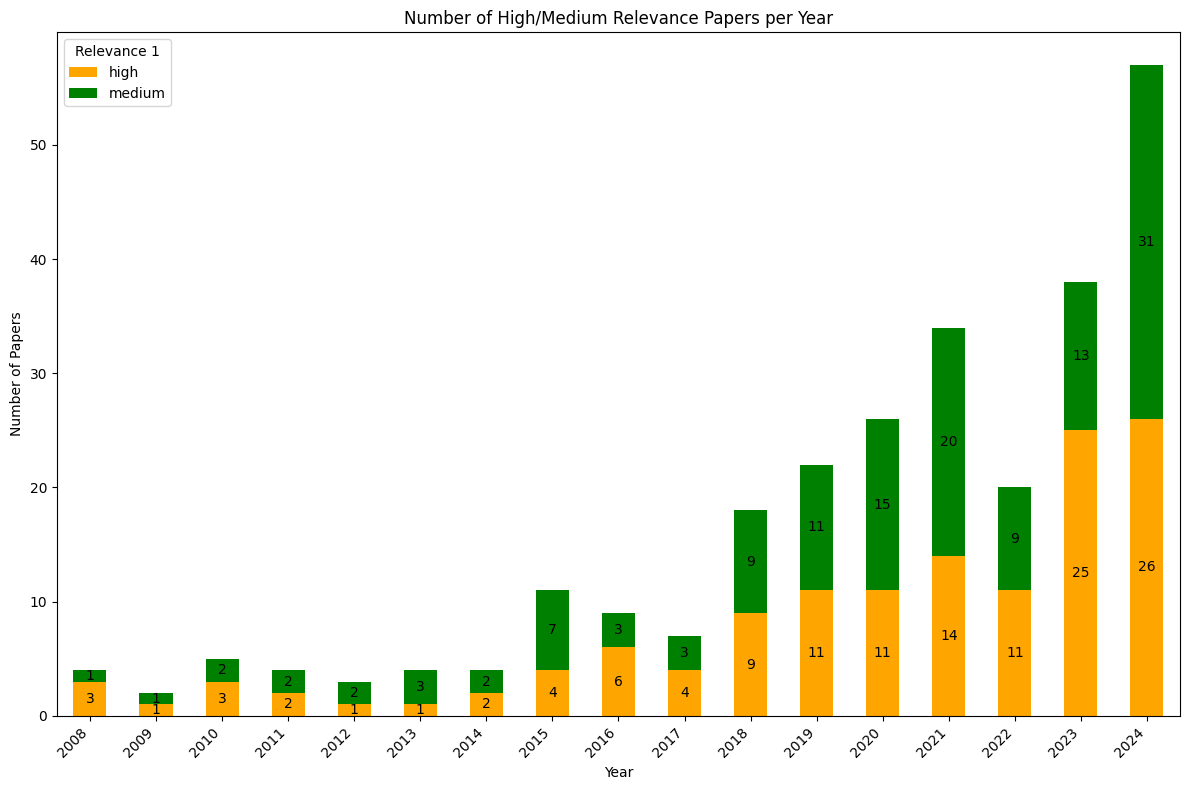

In [ ]:
# Step 5: Bar Chart - High/Medium Papers per Year

# Group high and medium relevance papers by year and relevance
high_medium_per_year =  filtered_df.pivot_table(index='year', columns='Relevance 1', aggfunc='size', fill_value=0)

# Plot stacked bar chart
ax = high_medium_per_year.plot(kind='bar', stacked=True, figsize=(12, 8), color=['orange', 'green'])

# Add numbers inside the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.title('Number of High/Medium Relevance Papers per Year')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

save_path = '/content/drive/My Drive/plots'
if not os.path.exists(save_path):
    os.makedirs(save_path)
plot_filename = os.path.join(save_path, 'filter_high_med_per_year.png')

plt.savefig(plot_filename)
plt.show()


In [ ]:
# Filter the DataFrame for 'high' and 'medium' relevance
filtered_df = df[df['Relevance 1'].isin(['high', 'medium'])]

# Extract keywords from high and medium relevance papers
keywords_list = filtered_df['keywords'].dropna().str.lower().str.split(', ')


# Flatten the list of keywords and count their frequency
keywords_flat = [keyword for sublist in keywords_list for keyword in sublist]
#print(keywords_flat)
keywords_counter = Counter(keywords_flat)

# Get the top keywords
top_keywords = keywords_counter.most_common(10)
top_keywords_df = pd.DataFrame(top_keywords, columns=['Keyword', 'Frequency'])
top_keywords_df



,Keyword,Frequency
0,social media,17
1,ethics,15
2,privacy,14
3,virtual reality,13
4,sustainability,13
5,artificial intelligence,11
6,trust,8
7,gender,8
8,augmented reality,8
9,machine learning,8


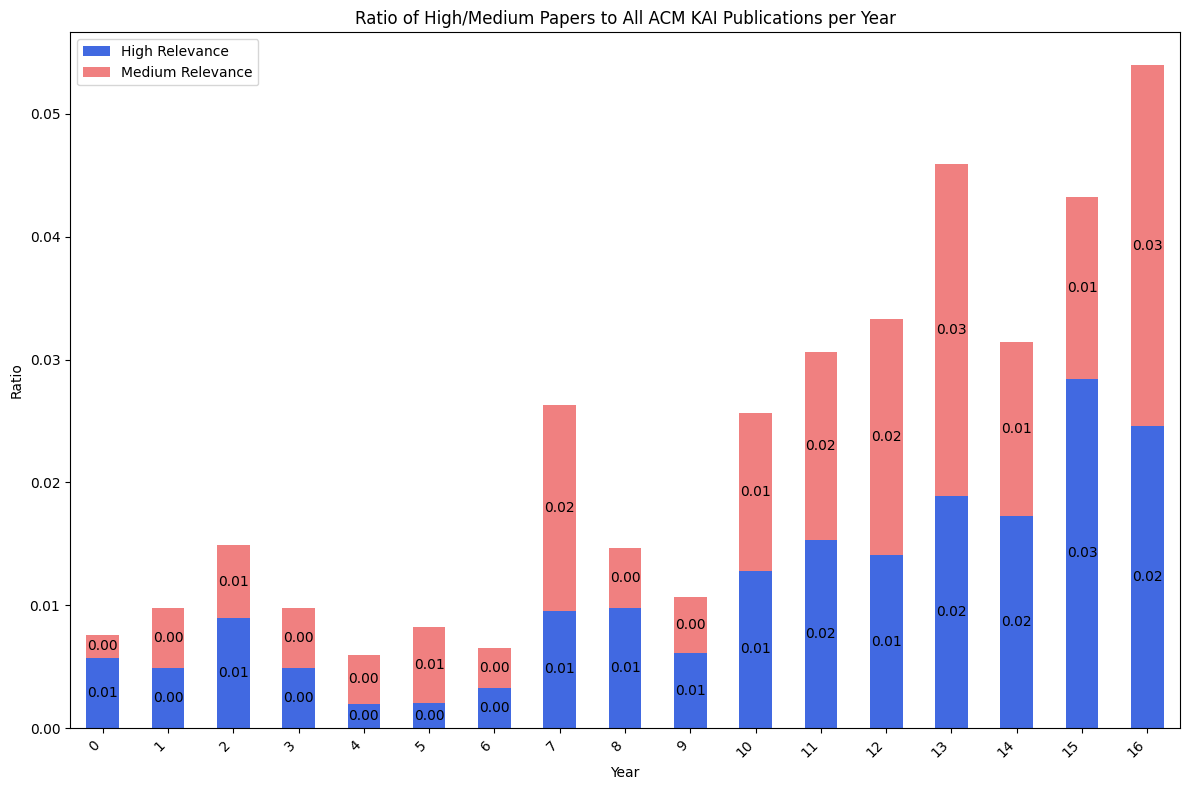

In [ ]:

# Example ACM KAI data structure
acm_kai_df = pd.DataFrame({'year': [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
                           'total_papers': [526, 204, 335, 409, 500, 485, 609, 418, 613, 656, 702, 719, 781, 741, 637, 879, 1057]})

# Assuming df is your original DataFrame containing the 'year' and 'Relevance 1' columns

# Filter high and medium relevance papers
high_papers = df[df['Relevance 1'] == 'high']
medium_papers = df[df['Relevance 1'] == 'medium']

# Group high and medium relevance papers by year
high_per_year = high_papers.groupby('year').size().reindex(acm_kai_df['year'], fill_value=0)
medium_per_year = medium_papers.groupby('year').size().reindex(acm_kai_df['year'], fill_value=0)

# Merge with ACM KAI data to get total papers published each year
merged_df = pd.merge(acm_kai_df, high_per_year.reset_index(name='High'), on='year', how='left')
merged_df = pd.merge(merged_df, medium_per_year.reset_index(name='Medium'), on='year', how='left')

# Calculate counts for all other papers from ACM KAI per year
merged_df['Other'] = merged_df['total_papers'] - merged_df['High'] - merged_df['Medium']

# Create a DataFrame for plotting
ratio_df = pd.DataFrame({
    'High Relevance': merged_df['High'] / merged_df['total_papers'],
    'Medium Relevance': merged_df['Medium'] / merged_df['total_papers'],
    # 'Other ACM KAI': merged_df['Other'] / merged_df['total_papers']  # Removed
})

# Plot stacked bar chart
ax = ratio_df.plot(kind='bar', stacked=True, figsize=(12, 8), color=['royalblue', 'lightcoral'])

# Add numbers inside the bars
for container in ax.containers:
    labels = [f'{v:.2f}' for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center')

plt.title('Ratio of High/Medium Papers to All ACM CHI Publications per Year')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot to the specified path in Google Drive
save_path = '/content/drive/My Drive/plots'
if not os.path.exists(save_path):
    os.makedirs(save_path)
plot_filename = os.path.join(save_path, 'ratio_per_year.png')

plt.savefig(plot_filename)
plt.show()


<ipython-input-78-5e9917fdb2fc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dual_category_papers['Combined Area'] = dual_category_papers.apply(


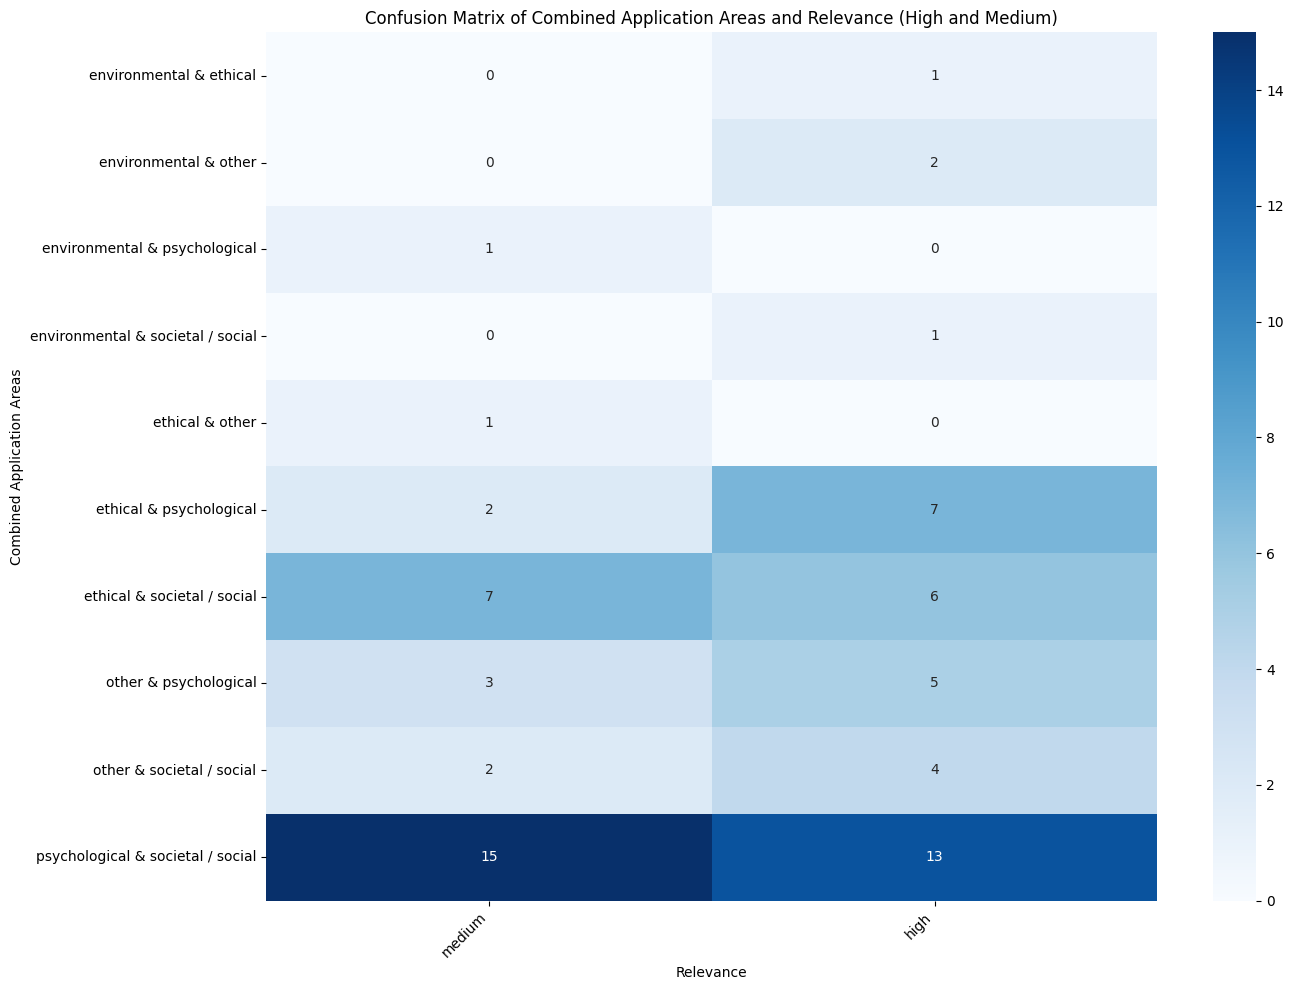

In [ ]:
# Filter the DataFrame to include only high and medium relevance papers
filtered_df = df[df['Relevance 1'].isin(['high', 'medium'])]

# Filter papers with both Application Area and Application Area 2
dual_category_papers = filtered_df.dropna(subset=['Application Area', 'Application Area 2'])

# Combine 'Application Area' and 'Application Area 2' into a single combined category, treating them the same regardless of order
dual_category_papers['Combined Area'] = dual_category_papers.apply(
    lambda row: ' & '.join(sorted([row['Application Area'], row['Application Area 2']])), axis=1)

# Create the confusion matrix
conf_matrix = pd.crosstab(dual_category_papers['Combined Area'], dual_category_papers['Relevance 1'])

# Sort the confusion matrix columns to the order 'low', 'medium', 'high'
relevance_order = ['medium', 'high']
conf_matrix = conf_matrix.reindex(columns=relevance_order, fill_value=0)

# Plot the confusion matrix
plt.figure(figsize=(14, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of Combined Application Areas and Relevance (High and Medium)')
plt.xlabel('Relevance')
plt.ylabel('Combined Application Areas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Save the plot to the specified path in Google Drive
save_path = '/content/drive/My Drive/plots'
if not os.path.exists(save_path):
    os.makedirs(save_path)
plot_filename = os.path.join(save_path, 'cm_appli_vs_relevance.png')

plt.savefig(plot_filename)
plt.show()

<ipython-input-79-63a040d1a29b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dual_category_papers['Combined Area'] = dual_category_papers['Application Area'] + ' & ' + dual_category_papers['Application Area 2']


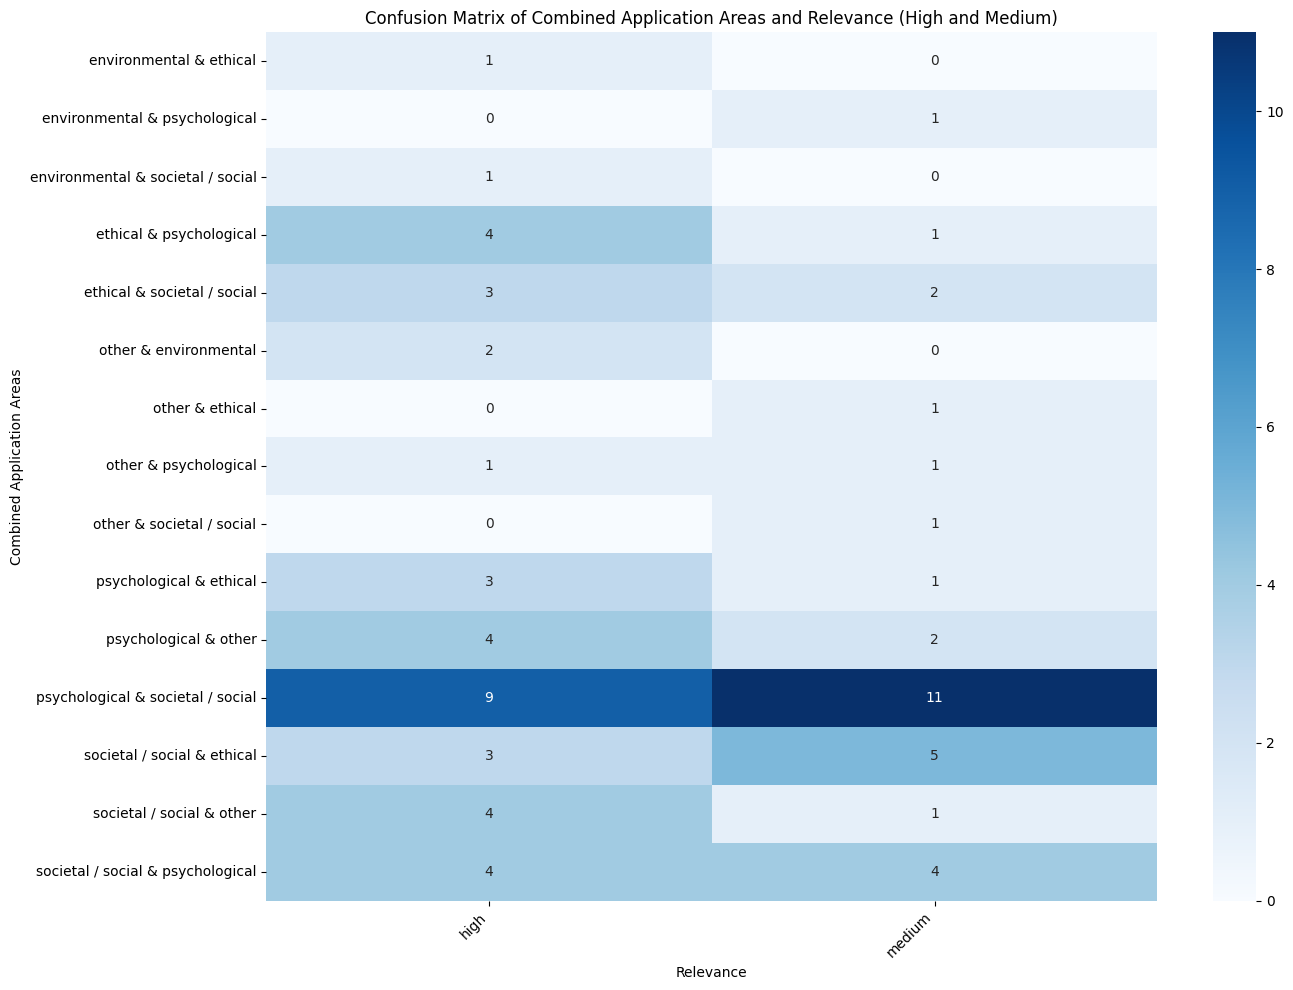

In [ ]:
# Filter papers with both Application Area and Application Area 2
filtered_df = df[df['Relevance 1'].isin(['high', 'medium'])]


# Filter papers with both Application Area and Application Area 2
dual_category_papers = filtered_df.dropna(subset=['Application Area', 'Application Area 2'])

# Create combined category pairs
dual_category_papers['Combined Area'] = dual_category_papers['Application Area'] + ' & ' + dual_category_papers['Application Area 2']

# Get unique categories for labeling
unique_combinations = dual_category_papers['Combined Area'].unique()

# Create a confusion matrix for Combined Area and Relevance
conf_matrix = pd.crosstab(dual_category_papers['Combined Area'], dual_category_papers['Relevance 1'])

# Plot the confusion matrix
plt.figure(figsize=(14, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of Combined Application Areas and Relevance (High and Medium)')
plt.xlabel('Relevance')
plt.ylabel('Combined Application Areas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

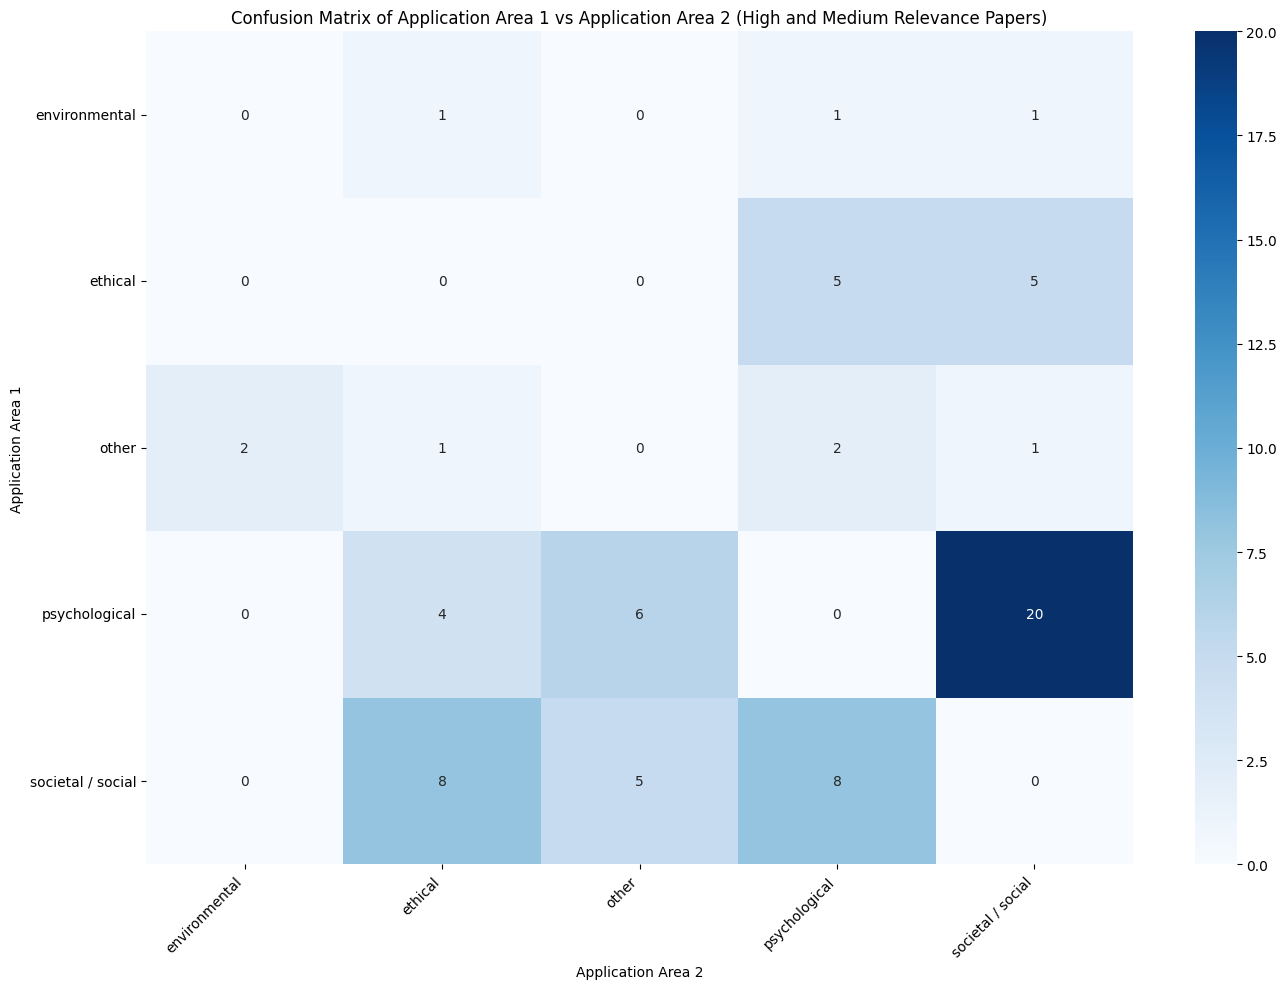

In [ ]:
# Filter the DataFrame to include only high and medium relevance papers
filtered_df = df[df['Relevance 1'].isin(['high', 'medium'])]

# Filter papers with both Application Area and Application Area 2
dual_category_papers = filtered_df.dropna(subset=['Application Area', 'Application Area 2'])

# Create a confusion matrix
conf_matrix = pd.crosstab(dual_category_papers['Application Area'], dual_category_papers['Application Area 2'])

# Plot the confusion matrix
plt.figure(figsize=(14, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of Application Area 1 vs Application Area 2 (High and Medium Relevance Papers)')
plt.xlabel('Application Area 2')
plt.ylabel('Application Area 1')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
# Save the plot to the specified path in Google Drive
save_path = '/content/drive/My Drive/plots'
if not os.path.exists(save_path):
    os.makedirs(save_path)
plot_filename = os.path.join(save_path, 'cm_appli1vs2.png')

plt.savefig(plot_filename)
plt.show()
plt.show()

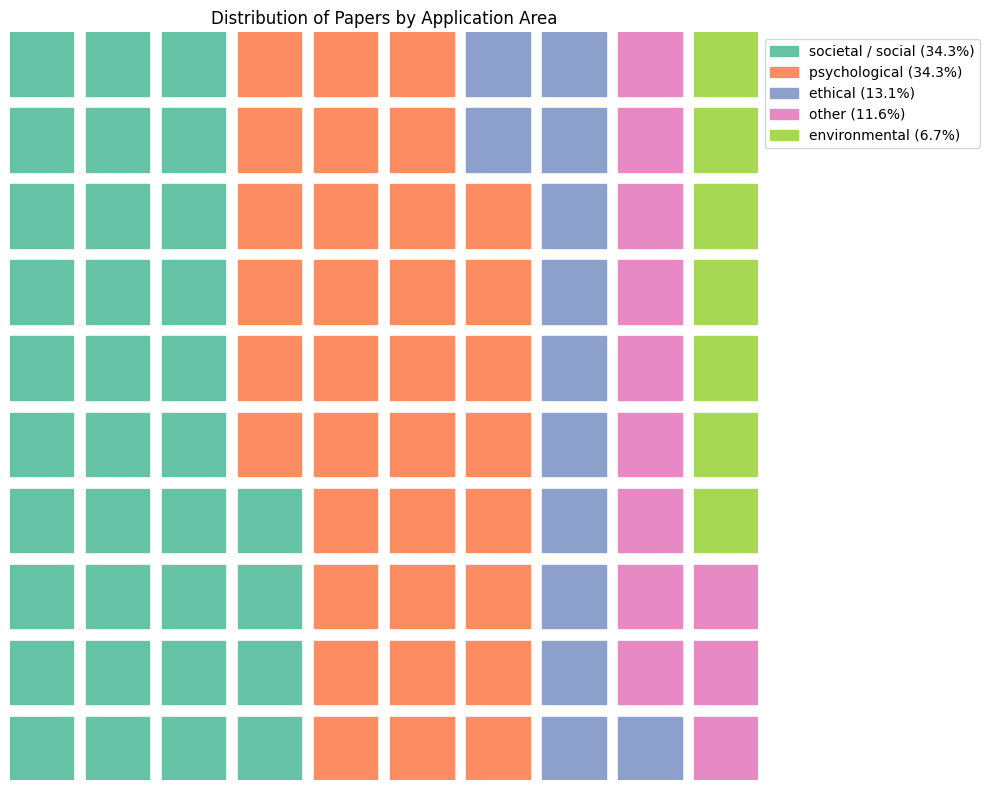

In [ ]:
# Count occurrences of each application area
combined_areas = pd.concat([df['Application Area'], df['Application Area 2']], ignore_index=True)
category_counts = combined_areas.value_counts()

# Calculate proportions
category_proportions = category_counts / category_counts.sum() * 100

# Create waffle plot
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    values=category_proportions,
    title={'label': 'Distribution of Papers by Application Area', 'loc': 'center'},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    labels=[f"{key} ({value:.1f}%)" for key, value in category_proportions.items()],
    figsize=(12, 8)
)
# Save the plot to the specified path in Google Drive
save_path = '/content/drive/My Drive/plots'
if not os.path.exists(save_path):
    os.makedirs(save_path)
plot_filename = os.path.join(save_path, 'waffle.png')

plt.savefig(plot_filename)
plt.show()